In [1]:
# Default style guide
from matplotlib import style
style.use('fivethirtyeight')

 # Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sqlalchemy import create_engine, inspect, text, desc

# ORM Stuff
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [3]:
 # Open the Threads
session = Session(engine) # ORM
conn = engine.connect() # Raw SQL/Pandas

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
--------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
--------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [5]:
# Declare a Base using `automap_base()`

# Use the Base class to reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

In [9]:
#metadata about the weather station
#uniquely identified by the station and the station metadata
query = text("""SELECT * from station LIMIT 5""")
df = pd.read_sql(query, con=conn)
df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
#unique measurement per station per day
#measurement table is uniquely identifiedd by station and date
query = text("""SELECT * from measurement LIMIT 5""")
df = pd.read_sql(query, con=conn)
df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
#unique measurement per station per day
query = text("""SELECT * from measurement where date = '2010-01-02' LIMIT 5""")
df = pd.read_sql(query, con=conn)
df

,id,station,date,prcp,tobs
0,2,USC00519397,2010-01-02,0.00,63.0
1,2726,USC00513117,2010-01-02,0.00,65.0
2,9009,USC00518838,2010-01-02,0.02,73.0
3,9520,USC00519523,2010-01-02,0.00,75.0
4,12189,USC00519281,2010-01-02,0.00,62.0


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
#row = session.query(Measurement).order_by(desc(Measurement.id)).first()
#print(row.date)

In [13]:
#rows = session.query(Measurement).filter(Measurement.date.between("2016-08-23", "2017-08-23")).all()
#data = []
#for Measurement in rows:
    #data.append([Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs]) 
#df = pd.DataFrame(data, columns=["date","precipitation", "station", "temperature"])
#df.sort_values(by="date", inplace=True)
#df.plot(x="date", y="precipitation")

In [14]:
#raw sql
query = text("""SELECT MAX(date) 
FROM Measurement;""")

conn.execute(query).fetchall()


[('2017-08-23',)]

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

query = text("""SELECT date, prcp
FROM Measurement
WHERE date >= (SELECT DATE(MAX(date), '-1 year') FROM Measurement)
ORDER BY date;""")
df = pd.read_sql(query, con=conn)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


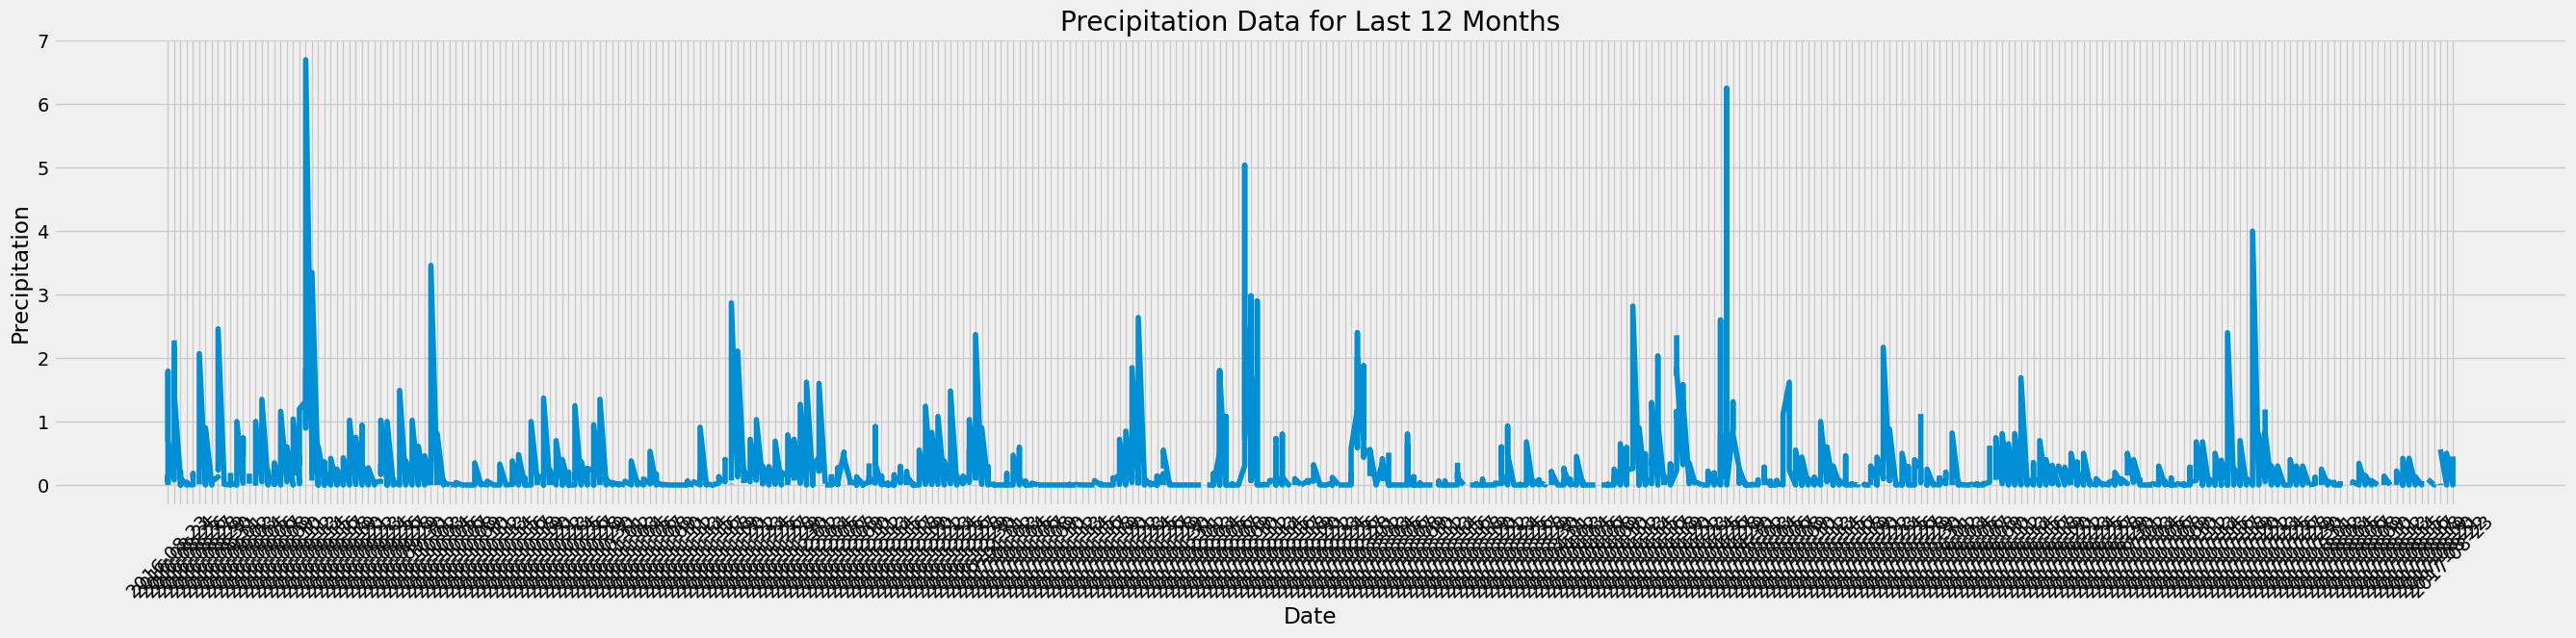

In [22]:
# Plotting the results
plt.figure(figsize=(30, 6))
plt.plot(df['date'], df['prcp'])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Data for Last 12 Months')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show() 

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(Station).count()
print(number_stations)

9


In [ ]:
#df["station"].nunique()

In [26]:
#raw sql
#query = text("""SELECT COUNT(DISTINCT station) AS station_count
#FROM station;""")
#conn.execute(query).fetchall()

[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

In [31]:
query = text(""" SELECT station, COUNT(*) AS station_count
FROM Measurement
GROUP BY station
ORDER BY station_count DESC; """)
conn.execute(query).fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
df2 = pd.read_sql(query, con=conn)
df2.head()

,station,station_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text (""" SELECT 
                    MIN(tobs) AS min_temp, 
                    MAX(tobs) AS max_temp, 
                    AVG(tobs) AS avg_temp
            FROM Measurement
            WHERE station = (SELECT station 
                     FROM Measurement
                     GROUP BY station
                     ORDER BY COUNT(*) DESC
                     LIMIT 1); """)

df3 = pd.read_sql(query, con=conn)
df3.head()


,min_temp,max_temp,avg_temp
0,54.0,85.0,71.663781


In [42]:
query = text (""" SELECT 
                    MIN(tobs) AS min_temp, 
                    MAX(tobs) AS max_temp, 
                    AVG(tobs) AS avg_temp
            FROM Measurement
            WHERE station = 'USC00519281'; """)

df3 = pd.read_sql(query, con=conn)
df3.head()


,min_temp,max_temp,avg_temp
0,54.0,85.0,71.663781


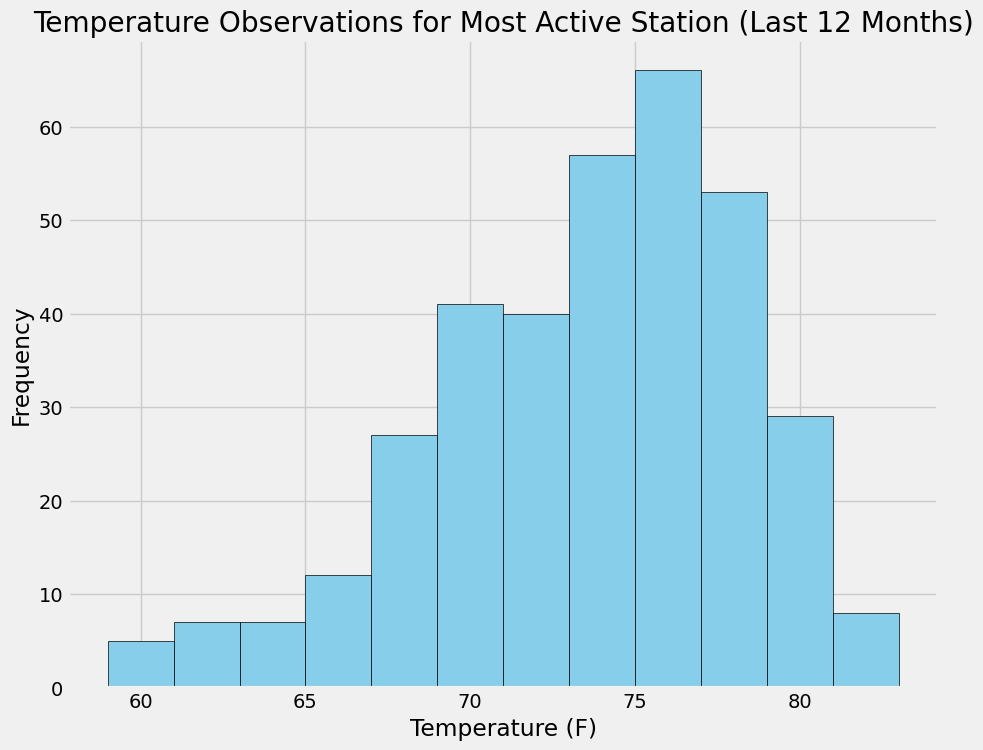

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = text("""
        SELECT tobs
        FROM Measurement
        WHERE station = (SELECT station 
                         FROM Measurement
                         GROUP BY station
                         ORDER BY COUNT(*) DESC
                         LIMIT 1)
          AND date >= (SELECT DATE(MAX(date), '-1 year') FROM Measurement);
    """)
df = pd.read_sql(query, con=conn)

# Create the histogram
plt.figure(figsize=(10, 8))
plt.hist(df['tobs'], bins=12, color='skyblue', edgecolor='black') 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Most Active Station (Last 12 Months)')
plt.grid(True)
plt.show()


In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#active_df = df[df["station"] == "USC00519397"]
#print("lowest temperature:", active_df["temperature"].min())
#print("highest temperature:", active_df["temperature"].max())
#print("average temperature:", active_df["temperature"].mean())

# Close Session

In [ ]:
# Close Session
session.close()
conn.close()

In [ ]:
engine.dispose